In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/abhijitpaul0212/DataSets/main/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [26]:
df.shape

(13320, 9)

There are 13,320 records and 9 features

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [28]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

There are null values in location, size, society, bath, balcony

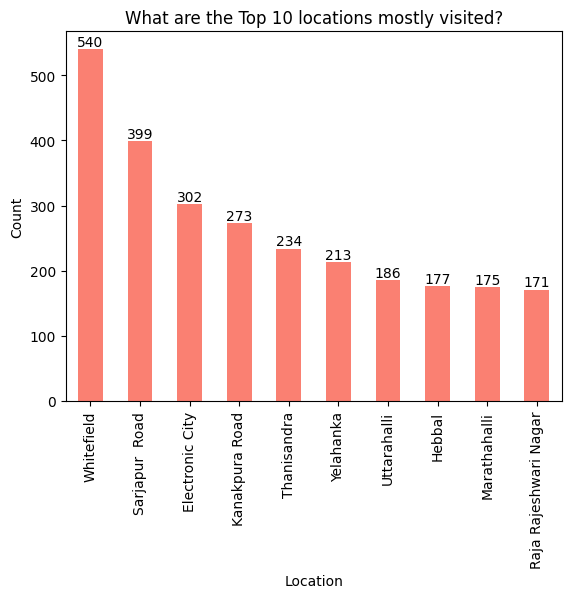

In [29]:
# Top 10 locations mostly visited

la = df['location'].value_counts().nlargest(10).plot(kind='bar', color='salmon') 

for p in la.patches:
    la.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 locations mostly visited?')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

### Feature Engineering

In [30]:
# Drop columns 'society' and 'availability'
df = df.drop(columns=['society', 'availability','location'])

# Convert 'total_sqft' to float64
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [35]:
# Fill missing values in the 'size' column with the mean
df['size'] = df['size'].fillna(value=df['size'].mode())

# Fill missing values in the 'bath' column using forward fill method
df['bath'] = df['bath'].fillna(method='ffill')
df['balcony'] = df['balcony'].fillna(method='ffill')

df = df.dropna()

In [37]:
df.isnull().sum()

area_type     0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [38]:
# categorical values of Size feaure

df['size'].value_counts()

size
2 BHK         5148
3 BHK         4254
4 Bedroom      811
4 BHK          546
3 Bedroom      542
1 BHK          492
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           55
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            12
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [39]:
df.describe()

,total_sqft,bath,balcony,price
count,13065.000000,13065.000000,13065.000000,13065.000000
mean,1554.546892,2.691772,1.605741,112.514048
std,1238.422934,1.335653,0.805588,149.662725
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1275.000000,2.000000,2.000000,72.000000
75%,1670.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


### Featture Engineering

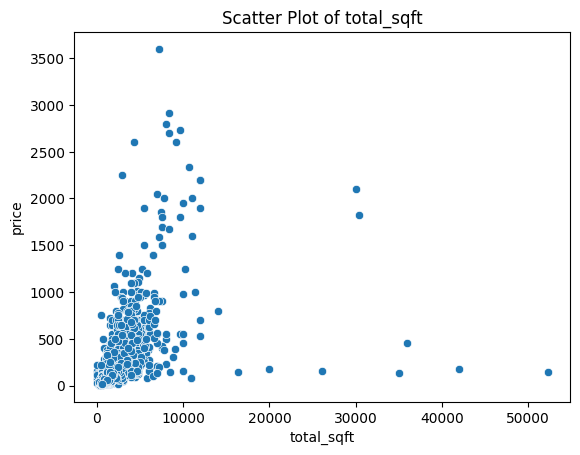

In [40]:
sns.scatterplot(x='total_sqft', y='price', data=df)  
plt.title('Scatter Plot of total_sqft')
plt.xlabel('total_sqft')
plt.ylabel('price')  
plt.show()

In [41]:
# Hadnling outliers by replacing values of total_sqft greater than 10000 with np.nan

df.loc[df['total_sqft'] >= 10000, 'total_sqft'] = np.nan

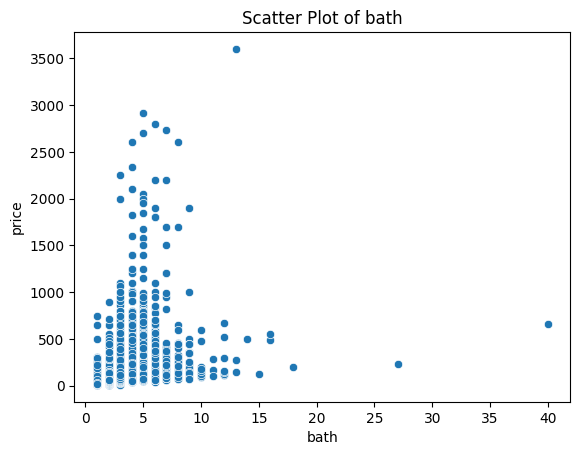

In [43]:
sns.scatterplot(x='bath', y='price', data=df)  
plt.title('Scatter Plot of bath')
plt.xlabel('bath')
plt.ylabel('price')  
plt.show()

In [45]:
# Hadnling outliers by replacing values of bath greater than 18 with np.nan

df.loc[df['bath'] >= 18, 'bath'] = np.nan

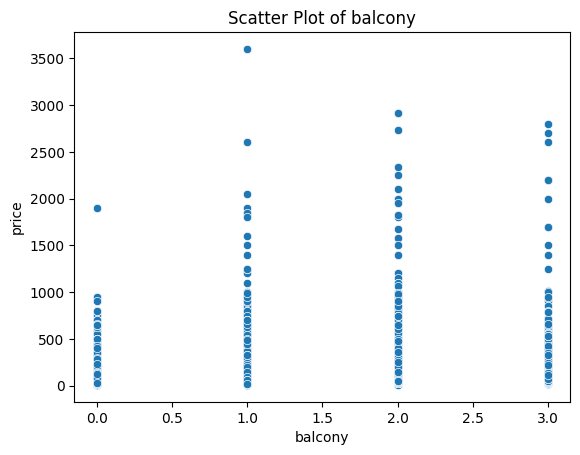

In [46]:
sns.scatterplot(x='balcony', y='price', data=df)  
plt.title('Scatter Plot of balcony')
plt.xlabel('balcony')
plt.ylabel('price')  
plt.show()

In [48]:
df = df.drop(columns=['area_type', 'size'])
df.head()

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00


In [49]:
df.isnull().sum()

total_sqft    27
bath           3
balcony        0
price          0
dtype: int64

In [50]:
# dropping values
df = df.dropna()

In [51]:
# Normalizing features
df['sqft_price']=df['total_sqft']*df['price']

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


### Model Building

In [53]:
X = df.drop(['price'], axis=1)
y = df['price']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = SVR()
clf.fit(X_train,y_train)

SVR()

In [61]:
clf.score(X_train,y_train)

0.49084633414246825

In [62]:
y_pred=clf.predict(X_test)
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
result_df

,Actual,Predicted
0,45.00,48.187868
1,162.00,107.458100
2,118.00,104.808114
3,86.65,75.337181
4,138.00,141.020610
...,...,...
2602,185.00,141.631625
2603,34.00,46.268524
2604,57.00,51.586420
2605,90.00,78.452402


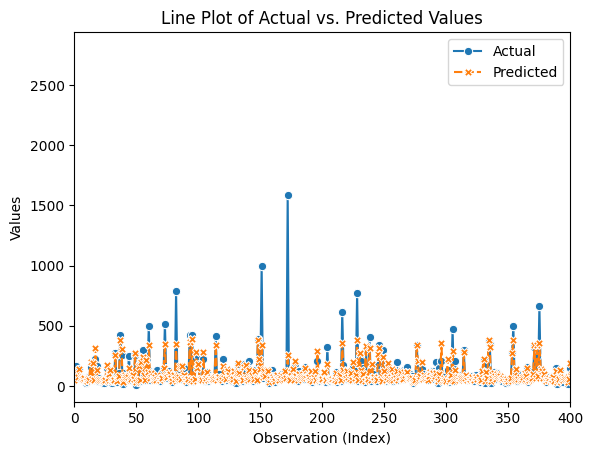

In [63]:
sns.lineplot(data=result_df, markers=True)
plt.xlabel('Observation (Index)')
plt.ylabel('Values')
plt.xlim(0,400)
plt.title('Line Plot of Actual vs. Predicted Values')
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score


acc = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is: ",acc )
score=r2_score(y_pred,y_test)
print("R-squared (coefficient of determination) score is : {:.2f}%".format(score * 100))
score=clf.score(X_train,y_train)
print("Accuracy for Training: {:.2f}%".format(score * 100))
score=clf.score(X_test,y_test)
print("Accuracy for Testing: {:.2f}%".format(score * 100))

Mean Absolute Error is:  24.265961316326
R-squared (coefficient of determination) score is : -38.58%
Accuracy for Training: 49.08%
Accuracy for Testing: 54.34%
